In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sqlalchemy import create_engine, text

In [ ]:
import cx_Oracle
import os
os.putenv(' NLS_LANG', '.UTF8')

In [ ]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
pd.options.plotting.backend = "plotly"


In [ ]:
dsn = cx_Oracle.makedsn('192.168.1.5', '1521', service_name = 'ORA11')
con = cx_Oracle.connect('dbam', 'dbamkass', dsn = dsn, encoding="UTF-8")
cur = con.cursor()

In [ ]:
sql_k200 = " select 일자, 종목코드2 종목코드, 종목명_국문 종목명, 당일가격, 지수내비중, 상장주식수, 유동비율, \
            지수주식수, 지수시가총액 \
             from KASS1.TH068 \
             where 익일적용여부 ='NXT' \
             and ISIN = 'KRD020020016' \
             order by 지수내비중 desc "

cur.execute(sql_k200)
k200_df = pd.DataFrame(cur.fetchall(), columns = [x[0] for x in cur.description])

k200_df['일자']=pd.to_datetime(k200_df['일자'], format ='%Y%m%d')
k200_df.set_index(['일자', '종목코드'], inplace=True)
k200_df.index.names=['Dates', 'Symbol']
k200_df.columns=['name', 'close', 'idx_weight', 'num_shares', 'float_rate', 'idx_num_shares', 'idx_cap']
k200_df=k200_df.sort_index(0)

<ipython-input-7-c380e1fc735c>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  k200_df=k200_df.sort_index(0)


In [ ]:
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

In [ ]:
period1='2023-01-01'
period2='2023-10-31'

In [ ]:
query_SSC=f"select * from SSC_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_SSC=pd.read_sql(query_SSC, conn)

In [ ]:
data_SSC.columns

Index(['Dates', 'Symbol', 'Name', 'MNGT', 'ClosePrc', 'OpenPrc', 'HighPrc',
       'LowPrc', 'AdjPrc', 'AdjPrc2', 'AdjPrc_High_20D', 'AdjPrc_Low_20D',
       'AdjPrc_High_60D', 'AdjPrc_Low_60D', 'AdjPrc_High_120D',
       'AdjPrc_Low_120D', 'AdjPrc_High_52W', 'AdjPrc_Low_52W', 'ListedShares',
       'ForeignStake', 'TradeStop', 'MktCap_Comm_Pref', 'MktCapCom', 'MktCap',
       'Volume', 'Volume_Avg_20D', 'Volume_Avg_60D', 'Volume_Avg_120D',
       'Volume_Avg_52W', 'Amt_Avg_20D', 'Amt_Avg_60D', 'Amt_Avg_120D',
       'Amt_Avg_52W', 'Vol_20D', 'Vol_120D'],
      dtype='object')

In [ ]:
query_COM=f"select * from COM_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_COM=pd.read_sql(query_COM, conn)

In [ ]:
data_COM.set_index(['Dates','Symbol'], inplace=True)

In [ ]:
data_COM.columns

Index(['Name', 'KC_Industry', 'FG_IndustryGroup27', 'FG_Sector_Idx',
       'FG_IndustryGroup_Idx', 'FG_Industry_Idx', 'AuditOpinion', 'Caution',
       'KSECapSize', 'KLCAIndustry', 'Market', 'KOSPI200YN', 'FiscalMonth'],
      dtype='object')

In [ ]:
k200comp=data_COM['KOSPI200YN'].unstack()

In [102]:
query_idx=f"select * from krx_idx"
krx_idx=pd.read_sql(query_idx, conn)

In [103]:
krx_idx.columns

Index(['Symbol Name', '코스피', '코스피 200', '코스피 100', '코스피 50', '코스닥 150', '코스닥',
       '코스피 200 동일가중', '코스피 대형주', '코스피 중형주', '코스피 소형주', '코스피 음식료품',
       '코스피 섬유,의복', '코스피 종이,목재', '코스피 화학', '코스피 의약품', '코스피 비금속광물', '코스피 철강및금속',
       '코스피 기계', '코스피 전기,전자', '코스피 의료정밀', '코스피 운수장비', '코스피 유통업', '코스피 전기가스업',
       '코스피 건설업', '코스피 운수창고', '코스피 통신업', '코스피 금융업', '코스피 증권', '코스피 보험',
       '코스피 서비스업', '코스피 제조업', '코스피 고배당 50 TR', '코스피 배당성장 50 TR', '코스피 우선주지수',
       '코스피 200 총수익지수', '코스피 200 중소형주', '코스피 200 건설 TR', '코스피 200 중공업 TR',
       '코스피 200 철강소재 TR', '코스피 200 에너지화학 TR', '코스피 200 정보기술 TR',
       '코스피 200 금융 TR', '코스피 200 생활소비재 TR', '코스피 200 경기소비재 TR',
       '코스피 200 산업재 TR', '코스피 200 헬스케어 TR', '코스피 200 커뮤니케이션서비스 TR',
       '코스피 200 ESG 지수'],
      dtype='object')

In [104]:
krx_idx.set_index('Symbol Name', inplace=True)

In [105]:
krx_idx=krx_idx.loc[:period2]

In [106]:
bm_ret=krx_idx[['코스피 200', '코스피 200 동일가중']].pct_change()

In [107]:
data_SSC.set_index(['Dates', 'Symbol'], inplace=True)

KeyError: "None of ['Dates', 'Symbol'] are in the columns"

In [100]:
prc=data_SSC['AdjPrc']

In [101]:
prc=prc.unstack()

In [ ]:
prc

In [ ]:
prc.shape

(204, 1198)

In [90]:
prc.dtypes

Symbol
A000010    float64
A000020    float64
A000030    float64
A000040    float64
A000050    float64
            ...   
A900140    float64
A950010    float64
A950070    float64
A950100    float64
A950210    float64
Length: 1198, dtype: object

In [ ]:
ret=prc.pct_change()

In [39]:
eom=['2023-02-28', '2023-03-31', '2023-04-28', '2023-05-31', '2023-06-30', 
     '2023-07-31', '2023-08-31', '2023-09-27', '2023-10-31']

In [49]:
data_path='../data/output/weight/'
mlq_w=pd.read_excel(data_path + 'monthly_port.xlsx', index_col=0)

In [50]:
mlq_w

,code,weights,name
dates,,,
2023-02-28,A001040,0.009461,CJ
2023-02-28,A096770,0.009461,SK이노베이션
2023-02-28,A006260,0.009461,LS
2023-02-28,A011790,0.009461,SKC
2023-02-28,A016380,0.009461,KG스틸
...,...,...,...
2023-10-31,A006800,0.009396,미래에셋증권
2023-10-31,A086280,0.009396,현대글로비스
2023-10-31,A178920,0.009396,PI첨단소재


In [51]:
mlq_w=mlq_w[mlq_w.index.isin(eom)]

In [52]:
mlq_w=mlq_w[['code', 'weights']].pivot_table(index='dates', columns='code')

In [53]:
mlq_w.reset_index(inplace=True)


In [54]:
eom

['2023-02-28',
 '2023-03-31',
 '2023-04-28',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-08-31',
 '2023-09-27',
 '2023-10-31']

In [55]:
mlq_w

dates   weights                                                    \
code              A000080   A000120   A000150   A000210   A000240   A000270   
0    2023-02-28       NaN  0.009461  0.009461       NaN       NaN       NaN   
1    2023-03-31       NaN       NaN       NaN       NaN       NaN  0.011639   
2    2023-04-28       NaN       NaN  0.009329       NaN       NaN       NaN   
3    2023-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
4    2023-06-30       NaN       NaN  0.009192       NaN       NaN  0.009192   
5    2023-07-31       NaN  0.009419       NaN       NaN       NaN       NaN   
6    2023-08-31  0.009463  0.009463       NaN  0.009463  0.009463  0.009463   
7    2023-09-27  0.009396  0.009396       NaN  0.009396  0.009396  0.009396   
8    2023-10-31  0.009396  0.009396  0.009396  0.009396  0.009396       NaN   

                                    ...                                \
code   A000660   A000670   A000720  ...   A323410   A326030   A329180   
0          NaN       NaN  0.009461  ...       NaN  0.009461  0.009461   
1     0.011639       NaN       NaN  ...       NaN       NaN       NaN   
2     0.009329  0.009329       NaN  ...  0.009329  0.009329  0.009329   
3          NaN  0.009372       NaN  ...       NaN  0.009372  0.009372   
4          NaN  0.009192       NaN  ...  0.009192  0.009192  0.009192   
5     0.009419  0.009419       NaN  ...  0.009419  0.009419  0.009419   
6          NaN       NaN       NaN  ...       NaN       NaN       NaN   
7          NaN       NaN       NaN  ...       NaN       NaN       NaN   
8          NaN       NaN       NaN  ...       NaN       NaN       NaN   

                                                                            
code   A336260   A352820   A373220   A375500   A381970   A383220   A402340  
0     0.009461       NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2     0.009329       NaN       NaN       NaN       NaN       NaN       NaN  
3     0.009372       NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
5          NaN  0.009419  0.009419       NaN       NaN       NaN  0.009419  
6          NaN       NaN       NaN  0.009463       NaN  0.009463       NaN  
7          NaN       NaN       NaN  0.009396  0.009396  0.009396       NaN  
8          NaN       NaN       NaN  0.009396  0.009396  0.009396       NaN  

[9 rows x 193 columns]

In [56]:
mlq_w['new_dates']=eom

In [57]:
mlq_w.set_index('new_dates', inplace=True)
mlq_w.drop(columns=['dates'], inplace=True)

<ipython-input-57-e941fd3bb88f>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  mlq_w.drop(columns=['dates'], inplace=True)


In [58]:
mlq_w.columns=mlq_w.columns.get_level_values(1)

In [59]:
mlq_w.index=pd.to_datetime(mlq_w.index)

In [60]:
mlq_w=mlq_w.fillna(0)

In [61]:
daily_w=pd.DataFrame(None, columns=mlq_w.columns, index=ret.loc[mlq_w.index[0]:].index)

In [62]:
mlq_w.index

DatetimeIndex(['2023-02-28', '2023-03-31', '2023-04-28', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-27',
               '2023-10-31'],
              dtype='datetime64[ns]', name='new_dates', freq=None)

In [63]:
daily_w.loc[mlq_w.index]=mlq_w

In [64]:
daily_w.fillna(method='ffill', inplace=True)
daily_w=daily_w.shift(1)

In [65]:
# daily_w.sum(1).plot()

In [66]:
mlq_ret=daily_w*ret.loc[daily_w.index]

In [67]:
mlq_idx_ret=mlq_ret.sum(1)

In [68]:
sys.path.append('../py')
import data_processing as proc
import utils
import performance as perf

In [69]:
idx_ret, idx_ret_cost, idx_cum_ret, idx_cum_retcost = perf.return_index(prc.loc[daily_w.index[0]:], 
                                                                        daily_w.fillna(0),
                                                                        cost=0.003)

In [70]:
(prc.loc[daily_w.index[0]:].pct_change() * daily_w.fillna(0)).sum(1)

Dates
2023-02-28    0.000000
2023-03-02    0.008755
2023-03-03   -0.003856
2023-03-06    0.004580
2023-03-07   -0.004881
                ...   
2023-10-25    0.006077
2023-10-26   -0.018348
2023-10-27    0.004052
2023-10-30    0.004708
2023-10-31   -0.002509
Length: 165, dtype: float64

In [71]:
idx_ret

Dates
2023-02-28    0.000000
2023-03-02    0.008755
2023-03-03   -0.003856
2023-03-06    0.004580
2023-03-07   -0.004881
                ...   
2023-10-25    0.006077
2023-10-26   -0.018348
2023-10-27    0.004052
2023-10-30    0.004708
2023-10-31   -0.002509
Length: 165, dtype: float64

In [72]:
idx_ret_cost

Dates
2023-02-28    0.000000
2023-03-02    0.005755
2023-03-03   -0.003856
2023-03-06    0.004580
2023-03-07   -0.004881
                ...   
2023-10-25    0.006077
2023-10-26   -0.018348
2023-10-27    0.004052
2023-10-30    0.004708
2023-10-31   -0.002509
Length: 165, dtype: float64

In [73]:
model_ret=pd.read_excel(data_path+'ret_strat.xlsx', index_col=0)

In [91]:
model_ret

,mfm,mfm_emp,dynamic
2023-01-02,-0.008779,-0.007292,-0.006716
2023-01-03,0.001826,-0.000216,-0.000291
2023-01-04,0.019695,0.015465,0.018791
2023-01-05,0.001663,0.004127,0.004887
2023-01-06,0.014489,0.009787,0.012526
...,...,...,...
2023-10-25,NaN,NaN,-0.003267
2023-10-26,NaN,NaN,-0.027196
2023-10-27,NaN,NaN,0.003322
2023-10-30,NaN,NaN,0.005067


In [108]:
final_ret=pd.concat([model_ret['dynamic'], idx_ret_cost, bm_ret], axis=1)


In [118]:
final_ret=final_ret.dropna()

In [119]:
final_ret.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 

In [120]:
# k200_ret_excess=final_ret[['mfm', 'mfm_emp', 'dynamic', 'mlq']].subtract(final_ret['k200'], axis=0)

In [121]:
# k200ew_ret_excess=final_ret[['mfm', 'mfm_emp', 'dynamic', 'mlq']].subtract(final_ret['k200ew'], axis=0)

In [122]:
# final_cumret=((1+k200_ret_excess).cumprod()-1)
# final_cumret_ew=((1+k200ew_ret_excess).cumprod()-1)


In [123]:
final_ret

,dynamic,mlq,k200,k200ew
2023-02-28,0.002677,0.000000,0.002739,0.001820
2023-03-02,0.005291,0.005755,0.004638,0.008460
2023-03-03,0.001132,-0.003856,0.000316,0.002391
2023-03-06,0.011246,0.004580,0.014477,0.001484
2023-03-07,-0.000464,-0.004881,-0.003552,-0.000221
...,...,...,...,...
2023-10-25,-0.003267,0.006077,-0.006092,0.008189
2023-10-26,-0.027196,-0.018348,-0.027615,-0.023989
2023-10-27,0.003322,0.004052,0.002535,0.000157
2023-10-30,0.005067,0.004708,0.001361,0.008358


In [124]:
final_cumret=(1+final_ret).cumprod()-1

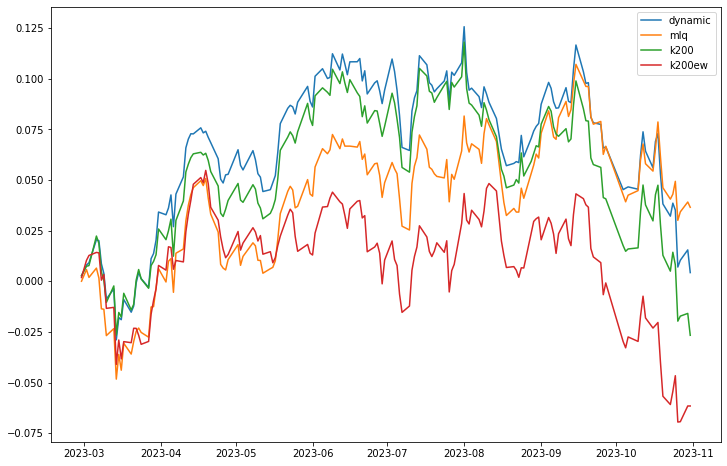

In [125]:
fig, ax1=plt.subplots(figsize=(12, 8))


for col in final_cumret.columns:
    plt.plot(final_cumret.index, final_cumret[col], label=col)
    plt.legend()
    # plt.text(.05,.95, col, bbox=bbox, fontsize=14, va='top', ha='left')
plt.show()


In [126]:
# temp_perf0 = perf.analyze_performance(final_ret['mfm'], 
#                                      model_name = 'mfm',
#                                      bm_return=final_ret['k200'])
# temp_perf1 = perf.analyze_performance(final_ret['mfm_emp'], 
#                                      model_name = 'mfm_emp',
#                                      bm_return=final_ret['k200'])
# temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
#                                      model_name = 'dynamic',
#                                      bm_return=final_ret['k200'])
# temp_perf3 = perf.analyze_performance(final_ret['mlq'],
#                                      # weights = daily_w,
#                                      model_name = 'mlq',
#                                      bm_return=final_ret['k200'])

In [127]:

temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
                                     model_name = 'dynamic')

temp_perf3 = perf.analyze_performance(final_ret['mlq'],
                                     # weights = daily_w,
                                     model_name = 'mlq')

In [128]:
pd.concat([temp_perf2, temp_perf3]).T # temp_perf0, temp_perf1, 

,dynamic,mlq
cum return(%),0.43,3.65
cagr(%),0.65,5.63
vol(te),0.14,0.14
sharpe(ir),0.05,0.41
mdd(%),-10.78,-6.96
turnover(%),0,0
start date,2023-02-28 00:00:00,2023-02-28 00:00:00
end date,2023-10-31 00:00:00,2023-10-31 00:00:00


In [129]:
# fig, ax1=plt.subplots(figsize=(12, 8))

# plt.plot(k200ew_ret_excess.index, final_cumret_ew)

# for col in k200ew_ret_excess.columns:
#     final_value = final_cumret_ew[col].iloc[-12]
#     plt.text(final_cumret_ew.index[-12], final_value, col, fontsize=14, va='bottom')

In [130]:
# temp_perf0 = perf.analyze_performance(final_ret['mfm'], 
#                                      model_name = 'mfm',
#                                      bm_return=final_ret['k200ew'])

# temp_perf1 = perf.analyze_performance(final_ret['mfm_emp'], 
#                                      model_name = 'mfm_emp',
#                                      bm_return=final_ret['k200ew'])

# temp_perf2 = perf.analyze_performance(final_ret['dynamic'], 
#                                      model_name = 'dynamic',
#                                      bm_return=final_ret['k200ew'])

# temp_perf3 = perf.analyze_performance(final_ret['mlq'],
#                                      # weights = daily_w,
#                                      model_name = 'mlq',
#                                      bm_return=final_ret['k200ew'])

In [131]:
# pd.concat([temp_perf0, temp_perf1, temp_perf2, temp_perf3]).T #  

## turnover ratio

In [132]:
w_diff=abs(daily_w.diff(1))
np.sum(w_diff).sum()

4.36129337505927

In [133]:
np.sum(w_diff).sum()**(1/(len(w_diff.index)-1)*252)

9.61221580021587

# monthly return plot

2023-03-31 00:00:00
2023-04-28 00:00:00
2023-05-31 00:00:00
2023-06-30 00:00:00
2023-07-31 00:00:00
2023-08-31 00:00:00
2023-09-27 00:00:00
2023-10-31 00:00:00


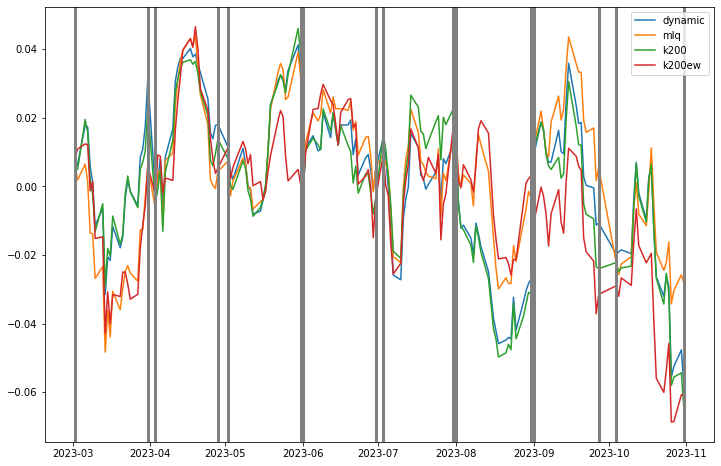

In [134]:
cumret_ls=[]
lastret_ls=[]
bm_ls=[]
init_ls=[]
end_ls=[]

temp_eom=final_ret.index+pd.offsets.MonthEnd(0)
temp_eom=temp_eom.unique()
for idx in temp_eom[1:]:
    
    temp_df = final_ret.loc[final_ret.index.to_period('M')==idx.to_period('M')]
    temp_cum_ret=(1+temp_df).cumprod()-1
    
    # temp_bm=bm_ret.loc[bm_ret.index.to_period('M')==idx.to_period('M')]           
    # temp_bm_ret=(1+temp_bm).cumprod()-1
    
    if temp_cum_ret.index[-1] not in init_ls:
        init_ls.append(temp_cum_ret.index[-1])
        end_ls.append(temp_cum_ret.index[0])
        
        # bm_ls.append(temp_bm_ret)
        cumret_ls.append(temp_cum_ret)
        lastret_ls.append(temp_cum_ret.iloc[-1])
                

# bm_ret_m=pd.concat(bm_ls) #.sort_index()
ret_m=pd.concat(cumret_ls) #.sort_index()

# ret_bm_m=pd.concat([ret_m, bm_ret_m], axis=1).dropna()
ret_m.columns=['dynamic', 'mlq', 'k200', 'k200ew'] # 'mfm', 'mfm_emp', 


fig, ax1=plt.subplots(figsize=(12, 8))

for col in ret_m.columns:
    plt.plot(ret_m.index, ret_m.loc[:, col], label=col)
    # plt.plot(ret_m.index, ret_m.iloc[:, -1], label=col, linewidth=2.5, linestyle='--')

for j, vl in enumerate(init_ls):
    print(vl)
    plt.axvline(x=vl, color='gray', linestyle='-', linewidth=3)
    plt.axvline(x=end_ls[j], color='gray', linestyle='-', linewidth=3)
    
# for col in ret_bm_m.columns:
    # final_value = ret_bm_m[col].iloc[-12]
    # plt.text(temp_cum_ret.index[-12], final_value, col, fontsize=14, va='bottom')
    # plt.text(1, y[i], str(txt), ha='center', va='bottom', fontsize=10, loc='best')

plt.legend()
plt.show()

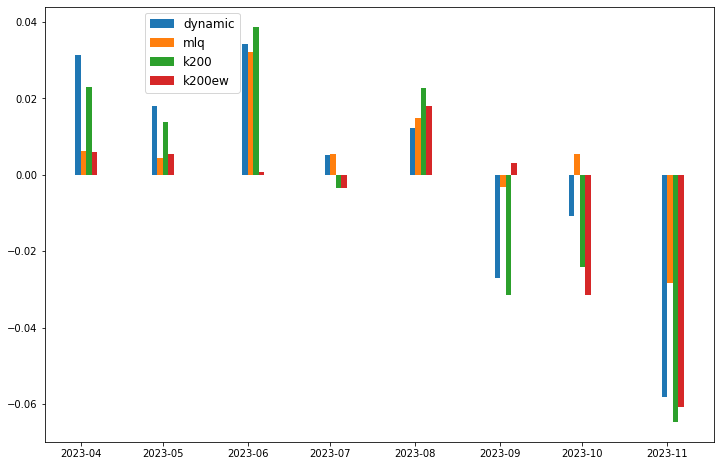

In [135]:
month_endret=pd.concat(lastret_ls, axis=1).T
month_endret.index.name='Dates'

fig, ax = plt.subplots(figsize = (12, 8))


for i, col in enumerate(month_endret.columns):
    plt.bar(month_endret.index + pd.DateOffset(days=i*2), month_endret[col], 2)
    
ax.legend(labels = month_endret.columns,
      fontsize = 12,
      title_fontsize = 18)
ax.legend_.set_bbox_to_anchor([0.3, 1])
    